In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [10]:
h = 10**(-3)
Tmax = 200
Nsteps = int(np.ceil(Tmax/h))
tol = 1.0e-14
itermax = 20
mu = 10**(3)

In [3]:
def func(y): 
    dy = np.zeros(2)
    dy[0] = y[1]
    dy[1] = mu*(1-y[0]**2)*y[1] - y[0]
    return dy

In [4]:
def Jac(y):
    Jac = np.zeros((2,2))
    Jac[0,0] = 0
    Jac[0,1] = 1
    Jac[1,0] = -2*mu*y[0]*y[1] - 1
    Jac[1,1] = mu*(1-y[0]**2)
    return Jac

In [5]:
def DIRK2step(y,h):
    k1 = func(y)
    for j in range(itermax):
        k1 = NewtonIterDIRK2_k1(y,h,k1)
        if np.linalg.norm(k1 - func(y + h*gamma*k1)) < tol:
            break

    k2 = k1
    for j in range(itermax):
        k2 = NewtonIterDIRK2_k2(y,h,k1,k2)
        aux = y + h*((1-gamma)*k1 + gamma*k2)
        if np.linalg.norm(k2 - func(aux)) < tol:
            break

    return aux

In [6]:
gamma = 1.0 - 1.0/np.sqrt(2)
def NewtonIterDIRK2_k1(y,h,k1):
    aux = y + h*gamma*k1
    F = k1 - func(aux)
    DF = np.identity(2) - h*gamma*Jac(aux)
    return k1 - np.linalg.solve(DF,F)

def NewtonIterDIRK2_k2(y,h,k1,k2):
    aux = y + h*((1-gamma)*k1 + gamma*k2)
    F = k2 - func(aux)
    DF = np.identity(2) - h*gamma*Jac(aux)
    return k2 - np.linalg.solve(DF,F)

In [11]:
y0 = np.array([2.0,0])
t0 = time.process_time()

solDIRK = np.zeros((Nsteps+1,2))
t = np.arange(0,(Nsteps+1)*h,h)
solDIRK[0,:] = y0
solDIRK[1,:] = DIRK2step(y0,h)
print("i =", 1, " sol =", solDIRK[1,:])
for j in range(1,Nsteps):
    solDIRK[j+1,:] = DIRK2step(solDIRK[j,:],h)
    if (j % 10000 == 0):
        print("i =", j, " sol =", solDIRK[j+1,:])
    
    
t1 = time.process_time()

print("Time elapsed: "+str(t1-t0))

i = 1  sol = [ 1.99999957e+00 -7.12498594e-04]
i = 10000  sol = [ 1.99331426e+00 -6.70404171e-04]
i = 20000  sol = [ 1.98659124e+00 -6.74210309e-04]
i = 30000  sol = [ 1.97982981e+00 -6.78087382e-04]
i = 40000  sol = [ 1.97302925e+00 -6.82037663e-04]
i = 50000  sol = [ 1.96618881e+00 -6.86063532e-04]
i = 60000  sol = [ 1.95930772e+00 -6.90167479e-04]
i = 70000  sol = [ 1.95238519e+00 -6.94352109e-04]
i = 80000  sol = [ 1.94542040e+00 -6.98620153e-04]
i = 90000  sol = [ 1.93841250e+00 -7.02974475e-04]
i = 100000  sol = [ 1.93136061e+00 -7.07418077e-04]
i = 110000  sol = [ 1.92426383e+00 -7.11954112e-04]
i = 120000  sol = [ 1.91712121e+00 -7.16585891e-04]
i = 130000  sol = [ 1.90993178e+00 -7.21316895e-04]
i = 140000  sol = [ 1.90269453e+00 -7.26150787e-04]
i = 150000  sol = [ 1.89540841e+00 -7.31091421e-04]
i = 160000  sol = [ 1.88807233e+00 -7.36142860e-04]
i = 170000  sol = [ 1.88068517e+00 -7.41309387e-04]
i = 180000  sol = [ 1.87324575e+00 -7.46595520e-04]
i = 190000  sol = [ 1.8657

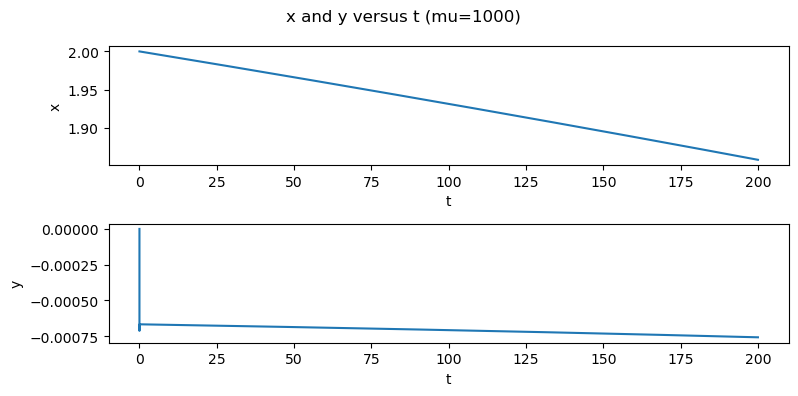

In [14]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(2, 1, figsize = (8,4))
ax[0].plot(t,solDIRK[:,0])
ax[0].set_xlabel("t")
ax[0].set_ylabel("x")

ax[1].plot(t,solDIRK[:,1])
ax[1].set_xlabel("t")
ax[1].set_ylabel("y")

fig.suptitle("x and y versus t (mu=1000)")
plt.tight_layout()

Text(0.5, 1.0, 'x versus y (mu=1000)')

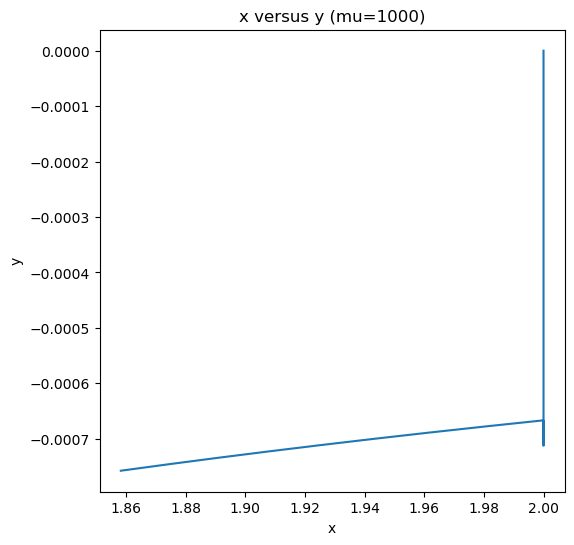

In [15]:
plt.figure(figsize=(6, 6))
plt.plot(solDIRK[:,0], solDIRK[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title("x versus y (mu=1000)")

CPU time = 2.317884 s


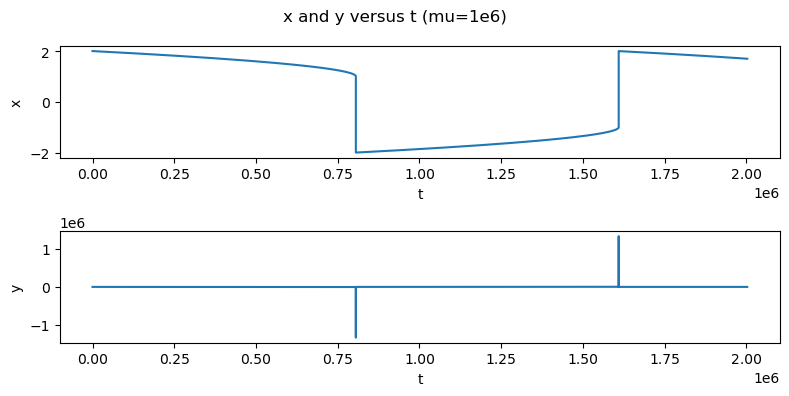

In [16]:
# Parameters
h = 1
Tmax = 2*10**6
atol = 10**(-5)
rtol = 10**(-5)
mu = 10**(6)
y0 = np.array([2.0,0])

def dirk2_step(y, h):
    gamma = 1 - 1/np.sqrt(2)
    I = np.eye(2)
    F1 = I - h * gamma * Jac(y)
    k1 = np.linalg.solve(F1, func(y))
    y1 = y + h * k1
    F2 = I - h * gamma * Jac(y1)
    k2 = np.linalg.solve(F2, func(y1))
    y_next = y + h * ((1 - gamma) * k1 + gamma * k2)
    return y_next

# Time integration setup
t = [0]
y = [y0]
error = []

start_time = time.time()

while t[-1] < Tmax:
    y_next = dirk2_step(y[-1], h)
    # Simple error estimate: difference between steps with h and h/2
    y_half_step = dirk2_step(y[-1], h/2)
    y_full_step = dirk2_step(y_half_step, h/2)
    e = np.linalg.norm(y_full_step - y_next, np.inf)
    error.append(e)

    if e < atol + rtol * np.linalg.norm(y_next, np.inf):
        # Accept the step
        t.append(t[-1] + h)
        y.append(y_next)
        # Increase the step size
        h *= 2
    else:
        # Reduce the step size
        h /= 2

end_time = time.time()
t_cpu = end_time - start_time
y = np.array(y)

# Plotting
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(2, 1, figsize = (8,4))
ax[0].plot(t,y[:,0])
ax[0].set_xlabel("t")
ax[0].set_ylabel("x")

ax[1].plot(t,y[:,1])
ax[1].set_xlabel("t")
ax[1].set_ylabel("y")

fig.suptitle("x and y versus t (mu=1e6)")
plt.tight_layout()

# plt.figure(figsize=(10, 8))
# plt.plot(t, [yi[0] for yi in y], label='x')
# plt.plot(t, [yi[1] for yi in y], label='y')
# plt.title('x and y versus T')
# plt.legend()

# # plt.tight_layout()
# plt.show()

print(f'CPU time = {t_cpu:.6f} s')

Text(0.5, 1.0, 'x versus y (mu=1e6)')

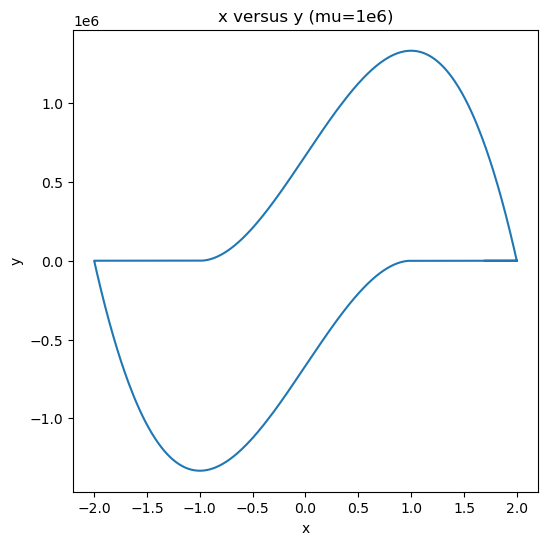

In [17]:
plt.figure(figsize=(6, 6))
plt.plot([yi[0] for yi in y], [yi[1] for yi in y])
plt.xlabel('x')
plt.ylabel('y')
plt.title("x versus y (mu=1e6)")